#Ejemlpo del análisis de ALMA
***
Este notebook explicará parte del funcionamiento de ALMA con dos paginas de web diferentes.

# Extracción de los datos de la pagina 
***
Dos Paginas:
* https://www.diabetes.org.uk/about_us/news/new-worse-cases-coronavirus

* https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1003797


## Feature-based text summarization

***
Aquí hemos usado el Algoritmo de Luhn's


In [ ]:
!pip install sumy
!pip install collections

     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 10.1 MB 37.4 MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21711 sha256=c308cbddc48b62207cad8dd7fbcd47b3a32ad047a5cc2f20121084809a77173e
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=68c250aaaa40c9c39a918e43b50640a639db9eedf6d1fe94d1b77321fba679c9
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built breadability pycountry
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.luhn import LuhnSummarizer
import nltk
nltk.download('punkt')
import collections

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### El primer enlace 

In [ ]:
LANGUAGE = "english"
SENTENCES_COUNT = 10
url="https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1003797"
parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
summarizer = LsaSummarizer()
summarizer = LsaSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)

text1 = ""
text_1 = []
for sentence in summarizer(parser.document, SENTENCES_COUNT):
  text_1.append(str(sentence))
  
for sentence in summarizer(parser.document, SENTENCES_COUNT):
  print(sentence)

Many problems underscored by the Coronavirus Disease 2019 (COVID-19) pandemic, and highlighted in other papers in this collection [ 1 ], center on addressing the grossly unequal availability of vaccine around the world.
Three decades ago, HIV presented an urgent, complex, dynamic, and wicked threat to health around the world in which global inequities were stark and unacceptable.
At the time, lifesaving antiretroviral therapy was available only in high-income countries, where it was expensive, delivered by highly trained specialists, and accompanied by sophisticated monitoring requirements (e.g., quantitative HIV plasma RNA levels and genotypical analysis).
A few advocated a larger scope (i.e., global progress on a wider range of health conditions), while many championed smaller and “more feasible” objectives, (i.e., emphasizing prevention only without treatment).
The Joint United Nations Programme on HIV/AIDS (UNAIDS) was established in 1994 through a UN resolution approved by all 193

In [ ]:
import numpy as np
import pandas as pd 
import string
import re  

df_t = pd.DataFrame (str(text_1).split(".") for  sent in text_1)

df_t['Sentences'] = df_t.iloc[0]
index = np.arange(0, 10)
df_t2 = pd.DataFrame (index= index, columns = ['Sentences'])
df_t2['Sentences'] = df_t['Sentences'].str.replace('[^\w\s]', '')
df_t2

,Sentences
0,Many problems underscored by the Coronavirus D...
1,Three decades ago HIV presented an urgent com...
2,At the time lifesaving antiretroviral therapy...
3,g
4,quantitative HIV plasma RNA levels and genoty...
5,A few advocated a larger scope i
6,e
7,global progress on a wider range of health co...
8,e
9,emphasizing prevention only without treatment


## El segundo enlace 

In [ ]:
LANGUAGE = "english"
SENTENCES_COUNT = 10
url="https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1003797"
parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
summarizer = LsaSummarizer()
summarizer = LsaSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)
for sentence in summarizer(parser.document, SENTENCES_COUNT):
  print(sentence)

In [ ]:
text_2 = []
for sentence in summarizer(parser.document, SENTENCES_COUNT):
  text_2.append(sentence)

text_2

In [ ]:
import pandas as pd
import numpy as np
import string
import re  

df_t1 = pd.DataFrame (str(text_2).split(".") for  sent in text_2)

df_t1['Sentences'] = df_t1.iloc[0]
index = np.arange(0, 10)
df_t3 = pd.DataFrame (index= index, columns = ['Sentences'])
df_t3['Sentences'] = df_t1['Sentences'].str.replace('[^\w\s]', '')

df_t3

,Sentences
0,Sentence Many problems underscored by the Coro...
1,Sentence Three decades ago HIV presented an u...
2,Sentence At the time lifesaving antiretrovira...
3,g
4,quantitative HIV plasma RNA levels and genoty...
5,Sentence A few advocated a larger scope i
6,e
7,global progress on a wider range of health co...
8,e
9,emphasizing prevention only without treatment


#Sentiment Analysis
Aquí ALMA analiza el grado de negatividad de cada fuente y da un grado final. Si la pagina tiene resultados negativos más que positivos, pues la pagina no es fiable y no debe confiar en su información 
***
* Grado < 0: Negativo
* Grado = 0: Neutral
* Grado > 0: Positivo

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud
from wordcloud import STOPWORDS
df = pd.DataFrame(data = df_t2)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


,Sentences
0,Many problems underscored by the Coronavirus D...
1,Three decades ago HIV presented an urgent com...
2,At the time lifesaving antiretroviral therapy...
3,g
4,quantitative HIV plasma RNA levels and genoty...
5,A few advocated a larger scope i
6,e
7,global progress on a wider range of health co...
8,e
9,emphasizing prevention only without treatment


In [ ]:
import seaborn as sns
import re
import os
import sys
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()

analyzer = SentimentIntensityAnalyzer()

In [ ]:
emptyline=[]
for row in df_t2['Sentences']: 
  vs = analyzer.polarity_scores(row) 
  emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments

,neg,neu,pos,compound
0,0.200,0.800,0.000,-0.7184
1,0.287,0.585,0.129,-0.7506
2,0.000,0.882,0.118,0.5574
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
5,0.000,1.000,0.000,0.0000
6,0.000,1.000,0.000,0.0000
7,0.000,0.762,0.238,0.6124
8,0.000,1.000,0.000,0.0000
9,0.000,1.000,0.000,0.0000


In [ ]:
# Merging the sentiments back to the origional  dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c

,Sentences,neg,neu,pos,compound
0,Many problems underscored by the Coronavirus D...,0.200,0.800,0.000,-0.7184
1,Three decades ago HIV presented an urgent com...,0.287,0.585,0.129,-0.7506
2,At the time lifesaving antiretroviral therapy...,0.000,0.882,0.118,0.5574
3,g,0.000,1.000,0.000,0.0000
4,quantitative HIV plasma RNA levels and genoty...,0.000,1.000,0.000,0.0000
5,A few advocated a larger scope i,0.000,1.000,0.000,0.0000
6,e,0.000,1.000,0.000,0.0000
7,global progress on a wider range of health co...,0.000,0.762,0.238,0.6124
8,e,0.000,1.000,0.000,0.0000
9,emphasizing prevention only without treatment,0.000,1.000,0.000,0.0000


In [ ]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c

,Sentences,neg,neu,pos,compound,Sentiment
0,Many problems underscored by the Coronavirus D...,0.200,0.800,0.000,-0.7184,Negative
1,Three decades ago HIV presented an urgent com...,0.287,0.585,0.129,-0.7506,Negative
2,At the time lifesaving antiretroviral therapy...,0.000,0.882,0.118,0.5574,Positive
3,g,0.000,1.000,0.000,0.0000,Positive
4,quantitative HIV plasma RNA levels and genoty...,0.000,1.000,0.000,0.0000,Positive
5,A few advocated a larger scope i,0.000,1.000,0.000,0.0000,Positive
6,e,0.000,1.000,0.000,0.0000,Positive
7,global progress on a wider range of health co...,0.000,0.762,0.238,0.6124,Positive
8,e,0.000,1.000,0.000,0.0000,Positive
9,emphasizing prevention only without treatment,0.000,1.000,0.000,0.0000,Positive


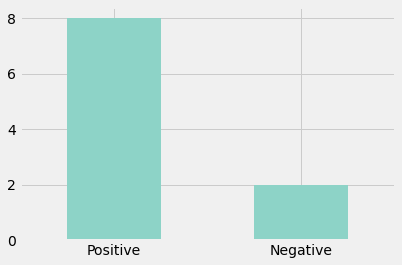

In [ ]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0,colormap ='Set3' );

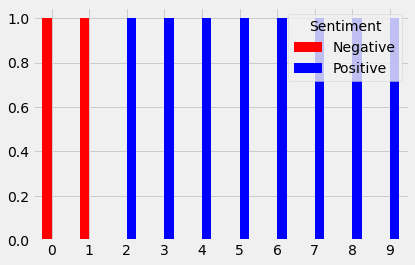

In [ ]:
#Sample code snippet
result=df_c.groupby(df_t2.index)['Sentiment'].value_counts().unstack()
result[['Negative','Positive']].plot(kind='bar',rot=0,color='rb')

In [ ]:
df_c['Sentiment'].value_counts(normalize=True)
print("El grado final is 80% positivo y 20% Negativo ")
print("---"*50)
print("Casi Fiable")

El grado final is 80% positivo y 20% Negativo 
------------------------------------------------------------------------------------------------------------------------------------------------------
Casi Fiable
